In [43]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load Dataset
data = pd.read_csv('/Users/saikrishnasimhadri/Downloads/day.csv')


In [44]:
# Initial Inspection
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [45]:
# Convert Date Column
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y', errors='coerce')

# Handling Categorical Variables
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})


In [46]:
# Create Dummy Variables
data = pd.get_dummies(data, drop_first=True)

# Feature Engineering
data['temp_scaled'] = data['temp'] * 41
data['hum_scaled'] = data['hum'] * 100
data['windspeed_scaled'] = data['windspeed'] * 67

In [47]:

# Drop Unnecessary Columns
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Split Data
X = data.drop('cnt', axis=1)
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Completed.")

Preprocessing Completed.


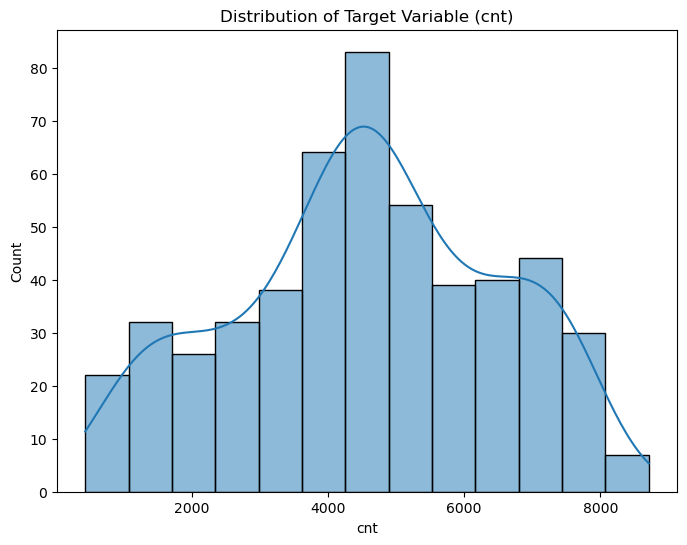

In [48]:

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Target Variable (cnt)')
plt.show()




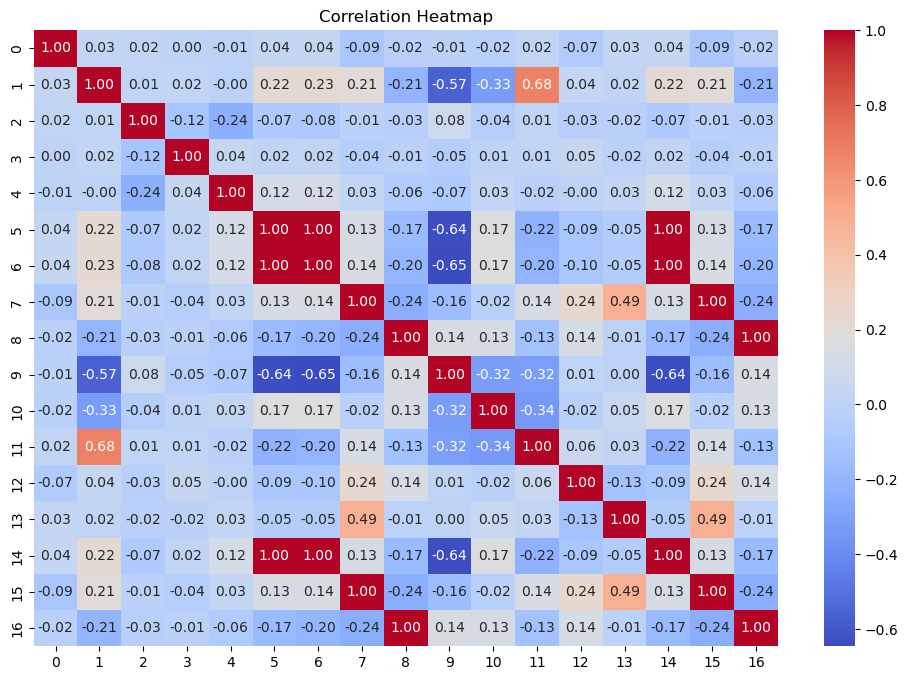

In [49]:
# Correlation Heatmap
correlation_matrix = pd.DataFrame(X_train).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



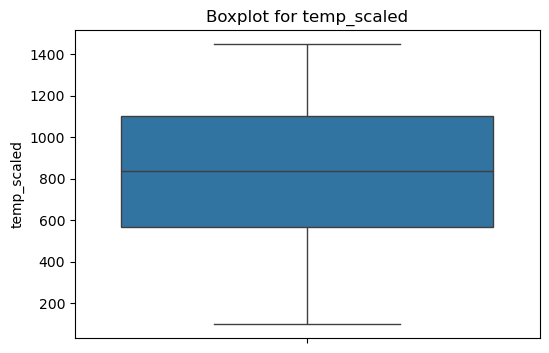

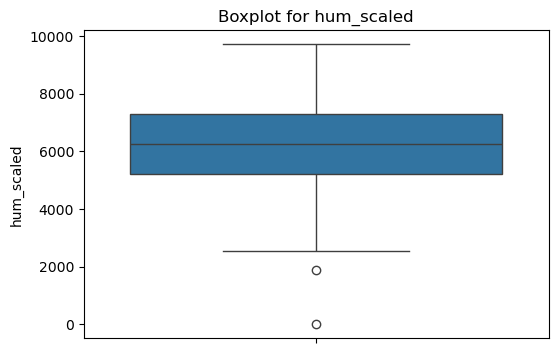

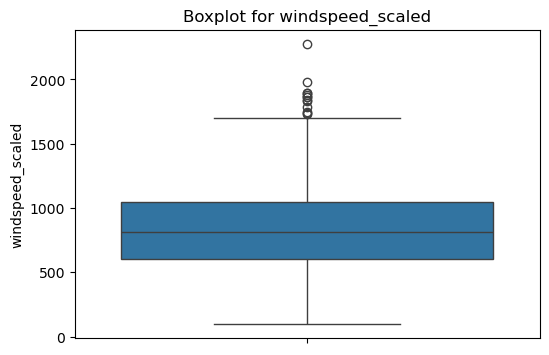

EDA Completed.


In [50]:
# Boxplots for Outliers
features = ['temp_scaled', 'hum_scaled', 'windspeed_scaled']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

print("EDA Completed.")

In [51]:

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')



R-squared: 0.8291
Mean Squared Error: 633994.1256


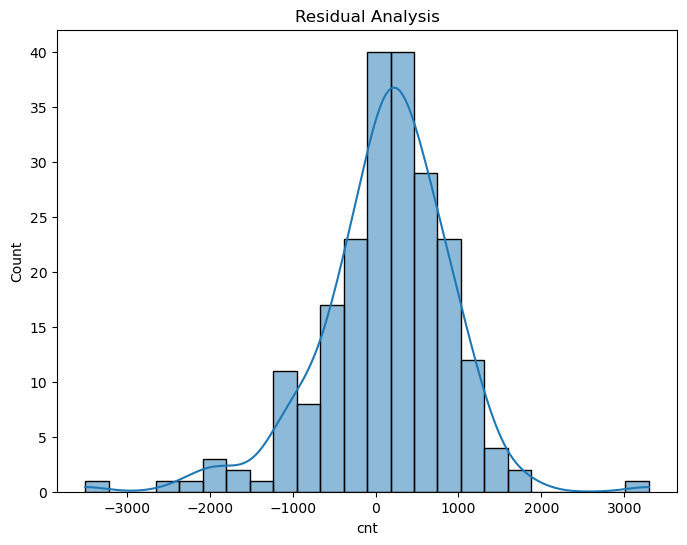

Model Building and Evaluation Completed.


In [52]:

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Analysis')
plt.show()

print("Model Building and Evaluation Completed.")

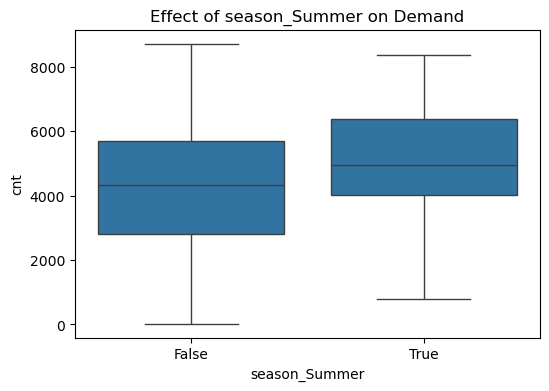

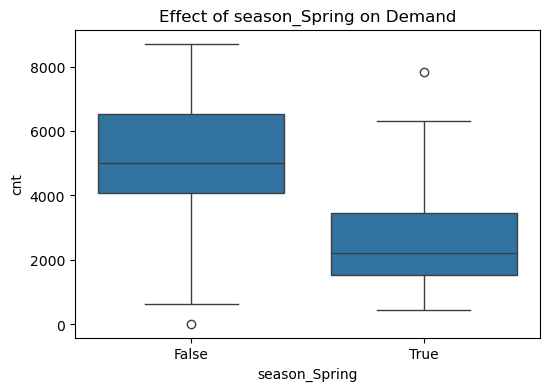

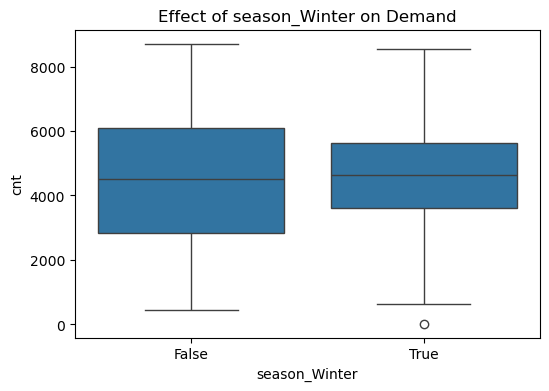

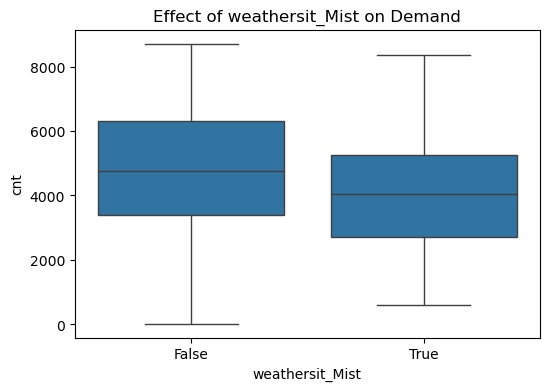

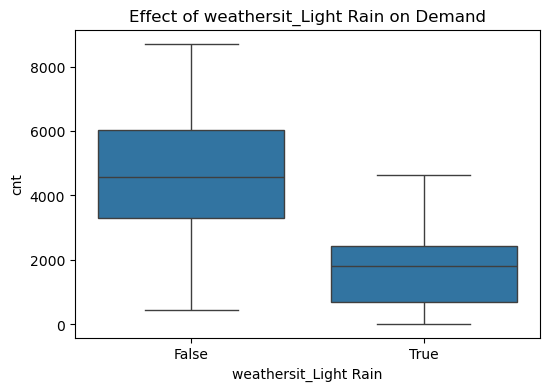

Categorical Analysis Completed.


In [53]:

# Categorical Variables Analysis
categorical_vars = ['season_Summer', 'season_Spring', 'season_Winter', 'weathersit_Mist', 'weathersit_Light Rain']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[var], y=y)
    plt.title(f'Effect of {var} on Demand')
    plt.show()

print("Categorical Analysis Completed.")


In [54]:
print(data.columns)


Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Light Rain', 'weathersit_Mist',
       'temp_scaled', 'hum_scaled', 'windspeed_scaled'],
      dtype='object')


In [55]:

# Dummy Variable Example with Existing Columns
categorical_vars = ['season_Spring', 'season_Summer', 'season_Winter', 
                    'weathersit_Mist', 'weathersit_Light Rain']

# Display the first few rows of the categorical variables
print(data[categorical_vars].head())
print("Dummy variables are already present in the dataset, avoiding the need to recreate them.")

# Note about drop_first=True
print("drop_first=True avoids multicollinearity by removing one category, and this has already been applied.")



   season_Spring  season_Summer  season_Winter  weathersit_Mist  \
0           True          False          False             True   
1           True          False          False             True   
2           True          False          False            False   
3           True          False          False            False   
4           True          False          False            False   

   weathersit_Light Rain  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
Dummy variables are already present in the dataset, avoiding the need to recreate them.
drop_first=True avoids multicollinearity by removing one category, and this has already been applied.


cnt                      1.000000
atemp                    0.630685
temp_scaled              0.627044
temp                     0.627044
yr                       0.569728
mnth                     0.278191
season_Summer            0.145325
weekday                  0.067534
season_Winter            0.064619
workingday               0.062542
holiday                 -0.068764
hum_scaled              -0.098543
hum                     -0.098543
weathersit_Mist         -0.170686
windspeed               -0.235132
windspeed_scaled        -0.235132
weathersit_Light Rain   -0.240602
season_Spring           -0.561702
Name: cnt, dtype: float64


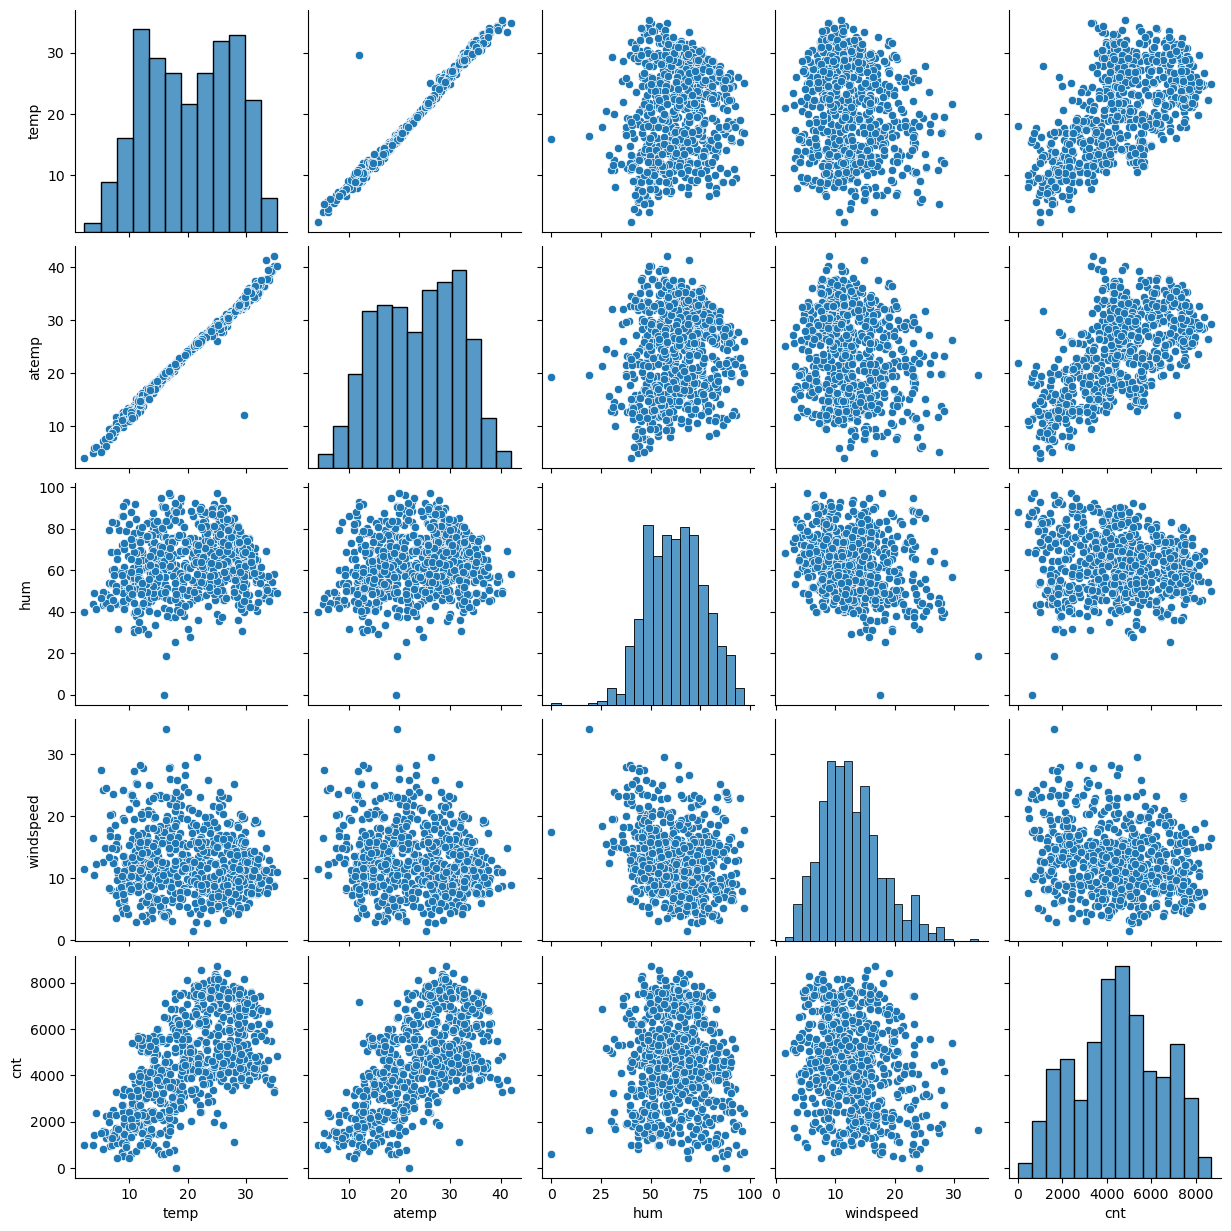

In [56]:

# Correlation Analysis
correlations = data.corr()['cnt'].sort_values(ascending=False)
print(correlations)
sns.pairplot(data, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()


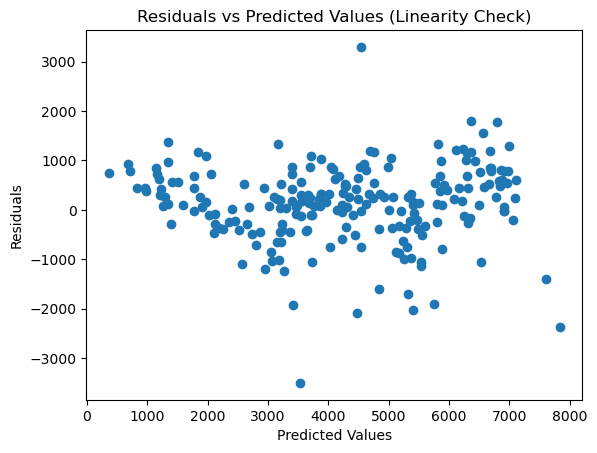

In [57]:

# Assumption Validation
from scipy import stats

# Linearity
plt.scatter(y_pred, y_test - y_pred)
plt.title('Residuals vs Predicted Values (Linearity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()





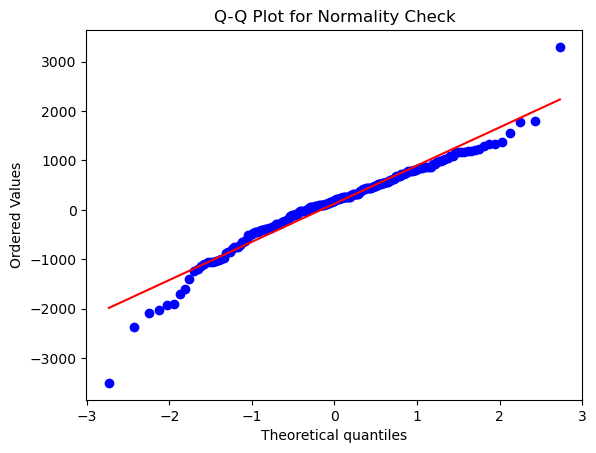

In [58]:
# Normality using Q-Q Plot
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.show()



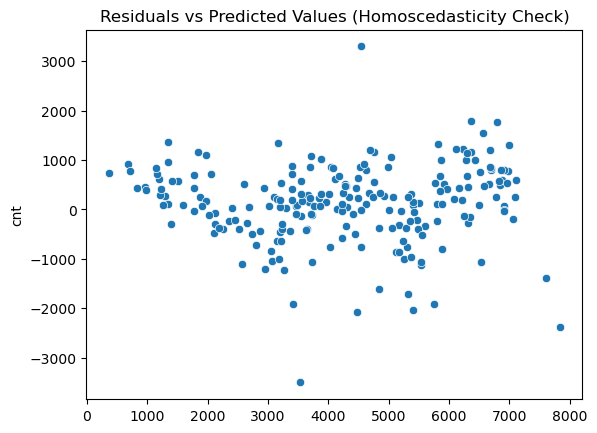

In [59]:
# Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred))
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.show()

In [60]:
print(X.head())
print(X.dtypes)
print(X.isnull().sum())
print(X.shape)


   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  season_Spring  season_Summer  season_Winter  \
0  10.749882           True          False          False   
1  16.652113           True          False          False   
2  16.636703           True          False          False   
3  10.739832           True          False          False   
4  12.522300           True          False          False   

   weathersit_Light Rain  weathersit_Mist  temp_scaled  hum_scaled  \
0                  False             True   578.544727     8058.33   
1                  False             True 

In [61]:
# Ensure all boolean columns are converted to integers (0 and 1)
X = X.astype(int)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)

                  Feature           VIF
0                      yr      2.043612
1                    mnth     14.005285
2                 holiday      1.120308
3                 weekday      3.217424
4              workingday      3.357088
5                    temp   4838.546479
6                   atemp    574.076799
7                     hum  49702.020677
8               windspeed   2129.453992
9           season_Spring      4.567928
10          season_Summer      2.704240
11          season_Winter      4.371934
12  weathersit_Light Rain      1.303060
13        weathersit_Mist      2.320294
14            temp_scaled   5569.329684
15             hum_scaled  50206.087369
16       windspeed_scaled   2264.247367


In [62]:

# Feature Importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(3))


               Coefficient
yr              987.117078
atemp           416.563438
season_Winter   347.156020


In [63]:
# Drop redundant variables
X = X.drop(['temp_scaled', 'hum_scaled', 'windspeed_scaled', 'atemp', 'mnth'], axis=1)

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                  Feature        VIF
0                      yr   2.031527
1                 holiday   1.110285
2                 weekday   3.153602
3              workingday   3.336414
4                    temp  17.353100
5                     hum  26.778628
6               windspeed   6.357283
7           season_Spring   3.780501
8           season_Summer   2.228712
9           season_Winter   2.895593
10  weathersit_Light Rain   1.277942
11        weathersit_Mist   2.268219


In [64]:
X = X.drop(['temp'], axis=1)  # Example: Dropping temp if it correlates with season


In [65]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                  Feature       VIF
0                      yr  1.926488
1                 holiday  1.104690
2                 weekday  3.060046
3              workingday  3.212323
4                     hum  9.627309
5               windspeed  5.576747
6           season_Spring  1.968851
7           season_Summer  1.989551
8           season_Winter  1.927805
9   weathersit_Light Rain  1.133070
10        weathersit_Mist  1.889806
